## Análise Exploratória de Dados com Python e Linguagem SQL

Neste Projeto utiliza-se análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. 
Os dados são reais e estão disponíveis publicamente:

Dados sobre filmes no <a href="https://www.imdb.com/interfaces/">IMDB</a>.

Análises:

-  Categorias de Filmes Mais Comuns no IMDB;
-  Número de Títulos Por Gênero;
-  Mediana de Avaliação dos Filmes Por Gênero;
-  Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia;
-  Filme Com Maior Tempo de Duração e cáculo de Percentis;
-  Relação Entre Duração e Gênero;
-  Número de Filmes Produzidos Por País.

## Instalando e Carregando Pacotes

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


https://pypi.org/

https://pypi.org/project/imdb-sqlite/

# Pacotes

In [5]:

# https://pypi.org/project/pycountry/
#!pip3 install -q pycountry
#!pip3 install --upgrade pip
#!pip3 install numpy
#!pip3 install -q imdb-sqlite
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install scikit-learn
#!pip3 install -q pycountry


# Imports

In [7]:
# Imports
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

## Carregando os Dados

In [208]:
#%%time
#!imdb-sqlite

#import os
#os.remove('imdb.db')

In [17]:
# Conecta no banco de dados
conn = sqlite3.connect("imdb.db")
print('conectado')

conectado


In [18]:
# Extrai a lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [19]:
# Tipo do objeto
type(tabelas)

pandas.core.frame.DataFrame

In [20]:
# Visualiza o resultado
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [21]:
# converter o dataframe em uma lista
tabelas = tabelas["Table_Name"].values.tolist()

In [22]:
# Percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,VARCHAR,0,None,0
1,1,show_title_id,VARCHAR,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,episode_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




## Categorias de Filmes Mais Comuns no IMDB

In [23]:
# Cria a consulta SQL
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type''' 

In [24]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

In [25]:
# Visualiza o resultado
display(resultado1)

,type,COUNT
0,movie,661815
1,short,959813
2,tvEpisode,7842847
3,tvMiniSeries,50961
4,tvMovie,143360
5,tvPilot,1
6,tvSeries,251511
7,tvShort,10062
8,tvSpecial,44161
9,video,282152


In [26]:
# Calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

In [27]:
# Visualiza o resultado
display(resultado1)

,type,COUNT,percentual
0,movie,661815,6.436000
1,short,959813,9.333962
2,tvEpisode,7842847,76.269895
3,tvMiniSeries,50961,0.495584
4,tvMovie,143360,1.394143
5,tvPilot,1,0.000010
6,tvSeries,251511,2.445887
7,tvShort,10062,0.097851
8,tvSpecial,44161,0.429456
9,video,282152,2.743864


In [28]:
# Criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
others['type'] = 'others'

In [29]:
# Visualiza
others

{'COUNT': 818543, 'percentual': 7.960143607645149, 'type': 'others'}

In [30]:
# Filtra o dataframe de resultado
resultado1 = resultado1[resultado1['percentual'] > 5]

In [31]:
# Append com o dataframe de outras categorias
resultado1 = resultado1.append(others, ignore_index = True)

In [32]:
# Ordena o resultado
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [33]:
# Visualiza
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,7842847,76.269895
1,short,959813,9.333962
3,others,818543,7.960144
0,movie,661815,6.436000


In [34]:
# Ajusta os labels
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

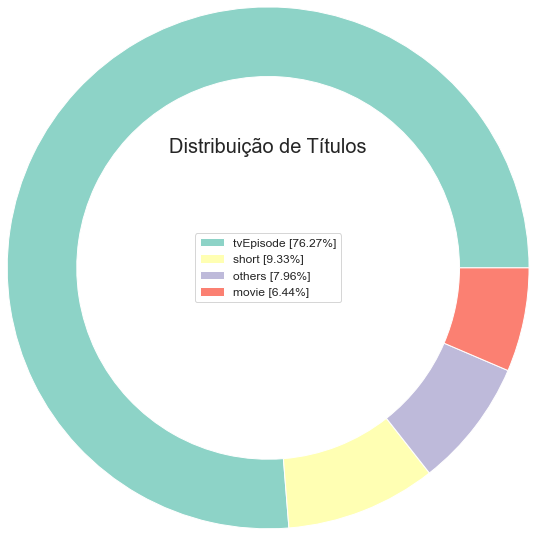

In [35]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## Títulos Por Gênero

Calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [36]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

In [37]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

In [38]:
# Visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,None,74030
1,Action,15005
2,"Action,Adult",12
3,"Action,Adult,Adventure",2
4,"Action,Adult,Comedy",5
...,...,...
1463,"Thriller,War,Western",3
1464,"Thriller,Western",41
1465,War,1365
1466,"War,Western",12


In [39]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

In [40]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

Usado o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero.

![title](imagens/one-hot.png)

In [41]:
# Criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [42]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [43]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [44]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [45]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [46]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [47]:
# Visualiza
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 1 to 1467
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1467 non-null   int64
 1   adult        1467 non-null   int64
 2   adventure    1467 non-null   int64
 3   animation    1467 non-null   int64
 4   biography    1467 non-null   int64
 5   comedy       1467 non-null   int64
 6   crime        1467 non-null   int64
 7   documentary  1467 non-null   int64
 8   drama        1467 non-null   int64
 9   family       1467 non-null   int64
 10  fantasy      1467 non-null   int64
 11  film-noir    1467 non-null   int64
 12  game-show    1467 non-null   int64
 13  history      1467 non-null   int64
 14  horror       1467 non-null   int64
 15  music        1467 non-null   int64
 16  musical      1467 non-null   int64
 17  mystery      1467 non-null   int64
 18  news         1467 non-null   int64
 19  reality-tv   1467 non-null   int64
 20  romance 

In [49]:
# Drop da coluna n
#generos = generos.drop(columns = 'n', axis = 0)

In [50]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

In [51]:
# Visualiza
generos_percentual.head(10)

drama          17.995910
comedy         16.837082
documentary    15.950920
adventure      14.519427
action         14.383095
romance        13.224267
crime          13.156101
mystery        12.474438
horror         12.474438
thriller       12.406271
dtype: float64

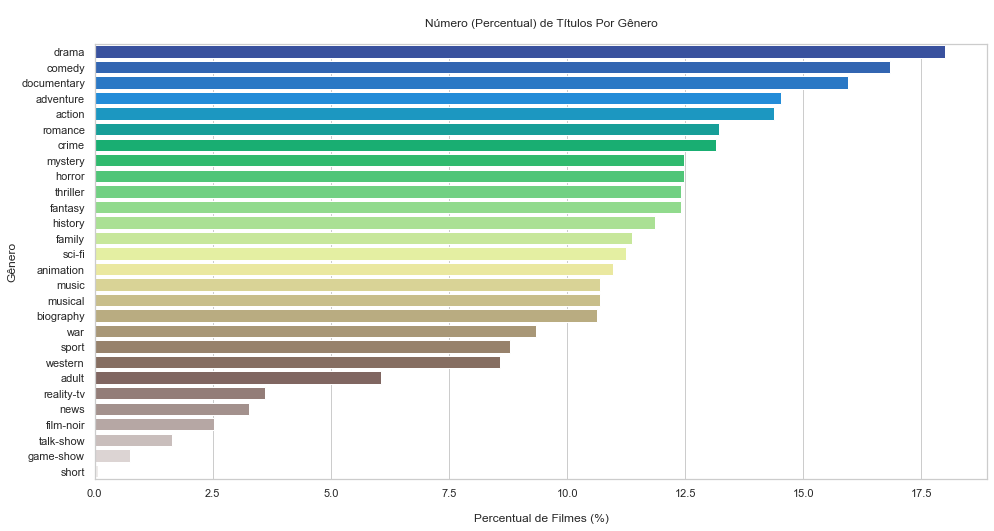

In [52]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

## Mediana de Avaliação dos Filmes Por Gênero

Mediana de avaliação dos filmes.

In [69]:
# Função para retornar os genêros
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [71]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [72]:
# Cria listas vazias
genero_counts = []
genero_ratings = []

In [73]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [74]:
# Prepara o dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings

In [75]:
# Visualiza
df_genero_ratings.head(20)

,genres,count,rating
0,action,0,NaN
1,adult,0,NaN
2,adventure,0,NaN
3,animation,0,NaN
4,biography,0,NaN
5,comedy,0,NaN
6,crime,0,NaN
7,documentary,0,NaN
8,drama,0,NaN
9,family,0,NaN


In [76]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings.drop(index = 18)

In [77]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

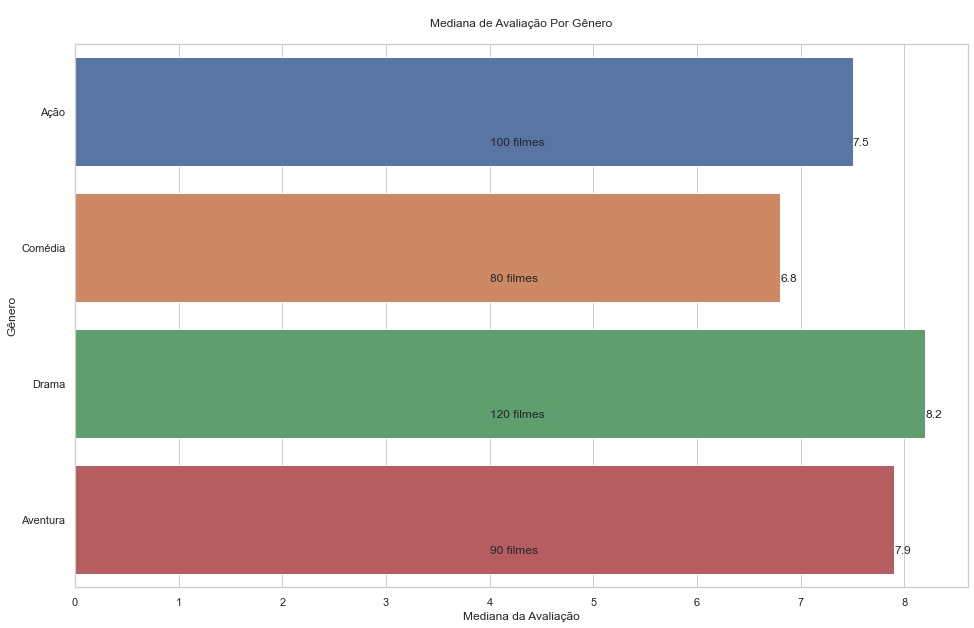

In [81]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show() 


## Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia

Número de filmes por gênero. Top 5.

In [91]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

In [92]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [93]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
10283013,"Action,Drama,Family"
10283014,"Action,Drama,Family"
10283015,"Action,Drama,Family"
10283016,Short


In [94]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

In [95]:
# Visualiza o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [96]:
# Contagem
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])

In [97]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [98]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

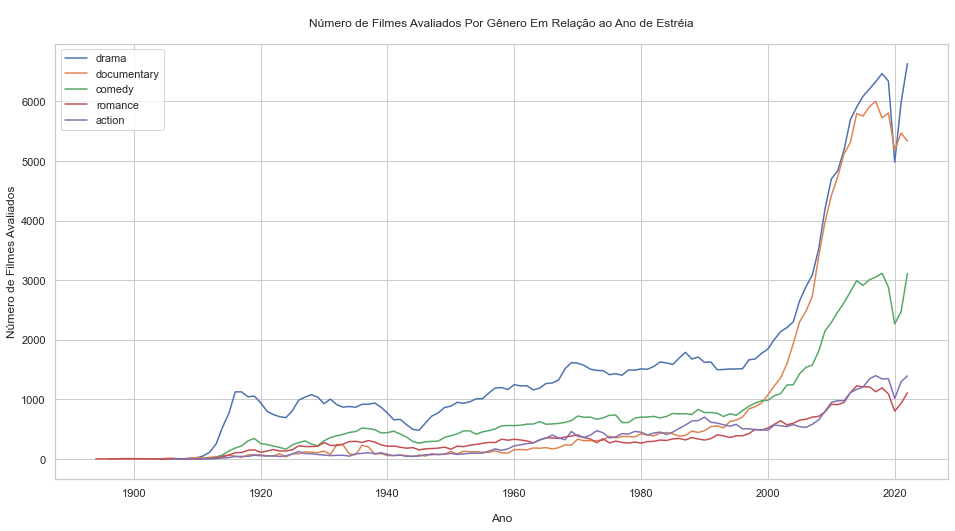

In [99]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

## Filme Com Maior Tempo de Duração e cáculo de Percentis

Percentis e filme mais longo da história.

In [100]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

In [101]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [102]:
display(resultado6)

,Runtime
0,45
1,100
2,100
3,70
4,90
...,...
416409,123
416410,57
416411,100
416412,116


In [126]:
# Loop para cálculo dos percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 169.0
1 percentil da duração (runtime) é: 169.0
2 percentil da duração (runtime) é: 169.0
3 percentil da duração (runtime) é: 169.0
4 percentil da duração (runtime) é: 169.0
5 percentil da duração (runtime) é: 169.0
6 percentil da duração (runtime) é: 169.0
7 percentil da duração (runtime) é: 169.0
8 percentil da duração (runtime) é: 169.0
9 percentil da duração (runtime) é: 169.0
10 percentil da duração (runtime) é: 169.0
11 percentil da duração (runtime) é: 169.0
12 percentil da duração (runtime) é: 169.0
13 percentil da duração (runtime) é: 169.0
14 percentil da duração (runtime) é: 169.0
15 percentil da duração (runtime) é: 169.0
16 percentil da duração (runtime) é: 169.0
17 percentil da duração (runtime) é: 169.0
18 percentil da duração (runtime) é: 169.0
19 percentil da duração (runtime) é: 169.0
20 percentil da duração (runtime) é: 169.0
21 percentil da duração (runtime) é: 169.0
22 percentil da duração (runtime) é: 169.0
23 percentil da duraç

In [123]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 ='''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE runtime = '169'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 


In [124]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [125]:
resultado6

,Runtime,primary_title
0,169,Federal Operator 99


Federal Operator 99 é o filme com maior duração

## Relação Entre Duração e Gênero

Relação entre duração do filme e gênero.

In [127]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [128]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [129]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

In [130]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [131]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [132]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [133]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [134]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

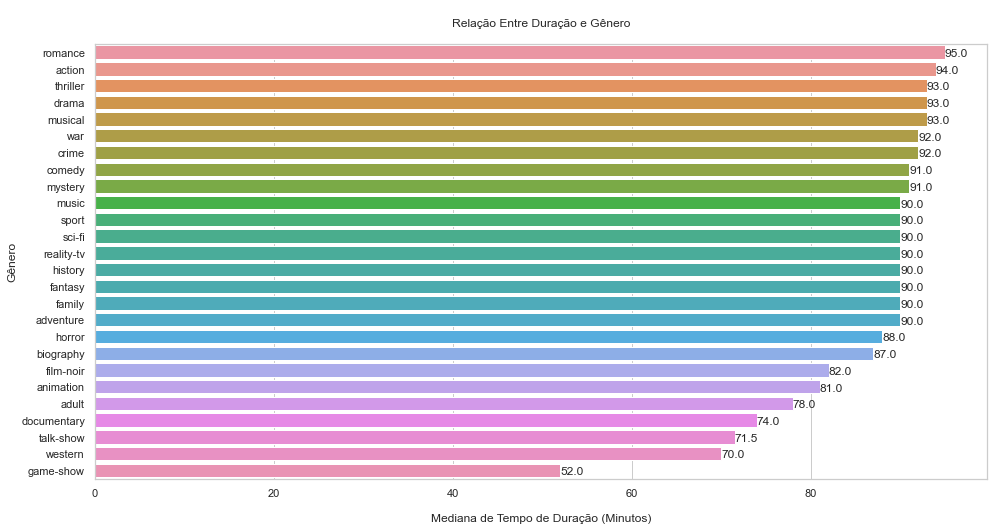

In [135]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

## Número de Filmes Produzidos Por País

Número de filmes produzidos por país.

In [136]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

In [137]:
# Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [138]:
display(resultado8)

,region,Number_of_movies
0,AD,23
1,AE,8859
2,AF,112
3,AG,13
4,AL,1331
...,...,...
231,YUCS,158
232,ZA,15263
233,ZM,63
234,ZRCD,3


In [139]:
# Shape
resultado8.shape

(236, 2)

In [140]:
# Número de linhas
resultado8.shape[0]

236

In [141]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [142]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]):
    try:
        coun = resultado8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(resultado8['Number_of_movies'].values[i])
    except: 
        continue

In [143]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

In [144]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [145]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
201,United States,342510
67,United Kingdom,171311
91,India,102690
32,Canada,99892
98,Japan,98901
65,France,92703
49,Germany,79586
60,Spain,72666
95,Italy,70765
26,Brazil,70079


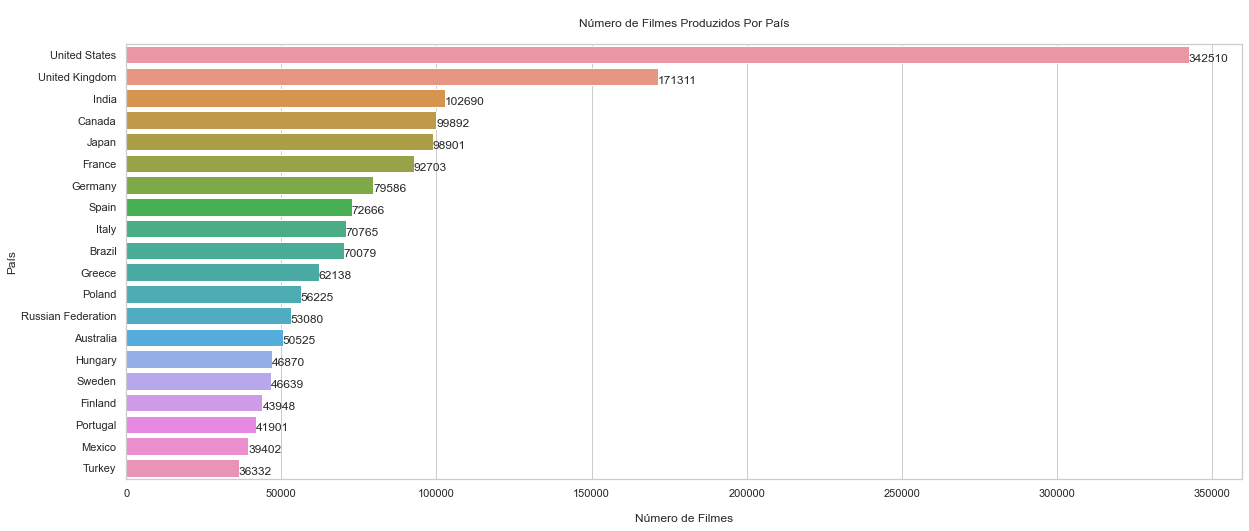

In [146]:
# Plot

# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")

# Loop
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

# Fim da Análise